<a href="https://colab.research.google.com/github/nick18-ni/Aula-de-Visao-Computscional/blob/main/Aula%202%2C_este_%C3%A9_o_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1


In [2]:
pip install pillow


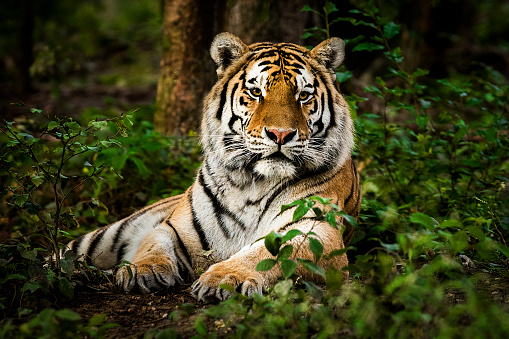

In [8]:
import cv2
from google.colab.patches import cv2_imshow

# Carrega a imagem
imagem_rgb = cv2.imread('/tigrão.jpg', cv2.IMREAD_COLOR) #inread carrega a imagem, cv2.IMRED_COLOR  carregar a imagem em núcleos , ou seja, a imagem será incluída no formato RGB (o padrão do OpenCV é BGR, mas geralmente esse parâmetro é usado para imagens coloridas).

# Verifica se a imagem foi carregada corretamente
if imagem_rgb is None:
    print("Erro: A imagem não foi carregada. Verifique o caminho do arquivo.")
else:
    cv2_imshow(imagem_rgb)

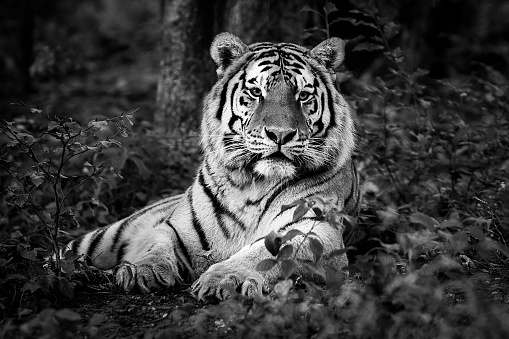

In [9]:
imagem_cinza = cv2.imread('/tigrão.jpg', cv2.IMREAD_GRAYSCALE)

cv2_imshow(imagem_cinza)  # Abre uma janela com a imagem

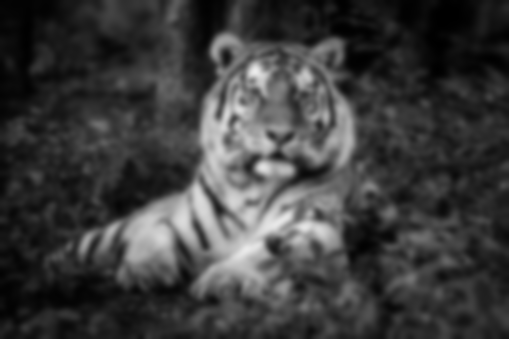

In [10]:
#imagem desfocada
imagem_blur = cv2.GaussianBlur(imagem_cinza, (17, 17), 0)

cv2_imshow(imagem_blur)  # Abre uma janela com a imagem

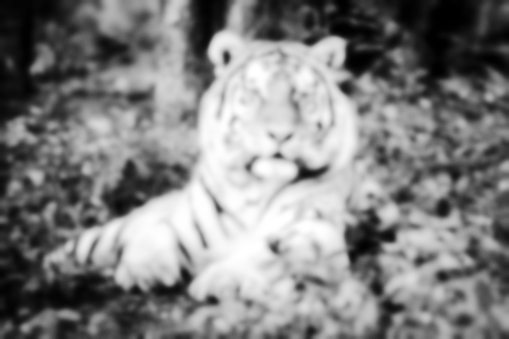

In [11]:
#equalização de hitograma na imagem desfocada
imagem_equalizada = cv2.equalizeHist(imagem_blur)

cv2_imshow(imagem_equalizada)  # Abre uma janela com a imagem

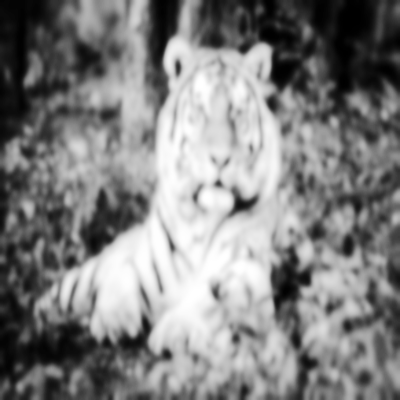

In [12]:
#redimencionar a imagem para(400x400)pixeus
imagem_redimencionada = cv2.resize(imagem_equalizada,(400,400))
cv2_imshow(imagem_redimencionada)  # Abre uma janela com a imagem

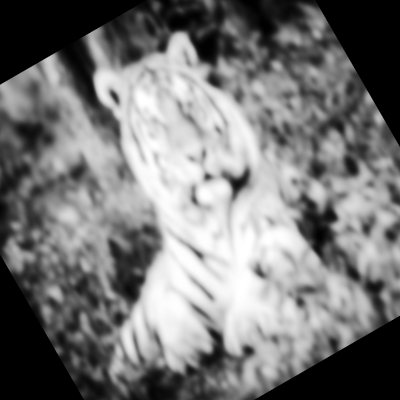

In [13]:
#rotacionar imagem 30 graus
# Supondo que 'imagem' já tenha sido carregada corretamente

(h, w) = imagem_redimencionada.shape[:2]
centro = (w // 2, h // 2)

# Cria a matriz de rotação
matriz_rotacao = cv2.getRotationMatrix2D(centro, 30, 1.0)

# Aplica a rotação na imagem original ou na imagem redimensionada
imagem_rotacionada = cv2.warpAffine(imagem_redimencionada, matriz_rotacao, (w, h))

# Exibe a imagem rotacionada
cv2_imshow(imagem_rotacionada)

# Aula 2

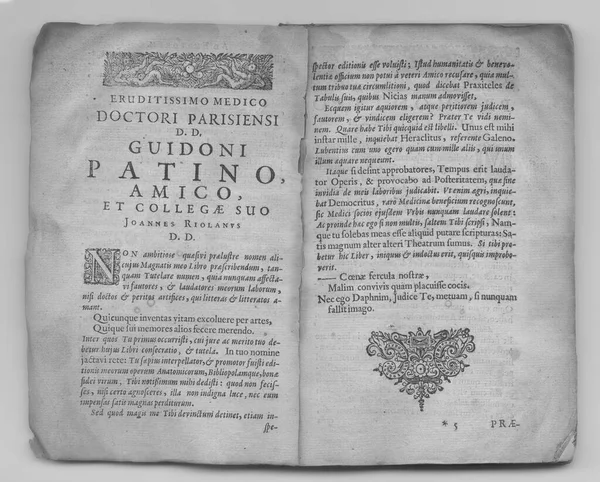

In [27]:
from google.colab.patches import cv2_imshow
import cv2

# Carrega a imagem
imagem_0 = cv2.imread('/Livro.jpg', 0) #o zero deixa em preto e branco
cv2_imshow(imagem_0)

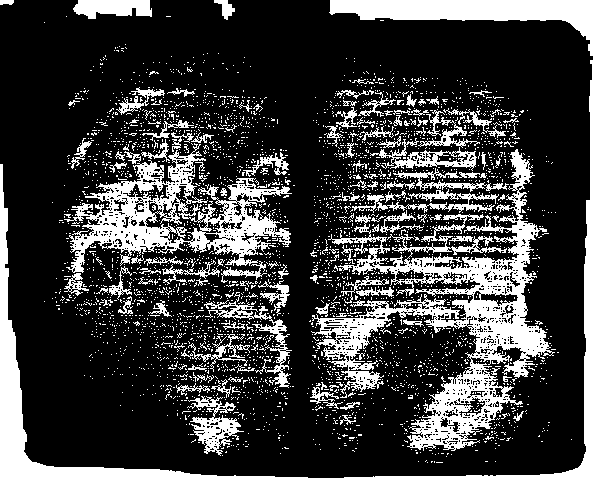

In [32]:
# aplicação thresholding
ret, imagem_thresh= cv2.threshold(imagem_0, 190, 255, cv2.THRESH_BINARY)
#ret: Isso representa o valor do limiar (threshold) que foi usado. Em alguns métodos de limiarização (como a binarização de Otsu), o limiar é calculado automaticamente e ret armazenará esse valor calculado. Na limiarização simples (como THRESH_BINARY), ret simplesmente armazenará o valor do limiar que você forneceu (190 neste caso)
cv2_imshow(imagem_thresh)

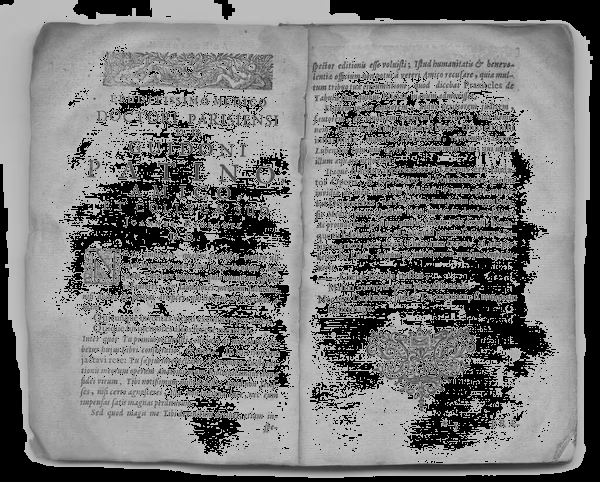

In [33]:
ret, imagem_thresh2= cv2.threshold(imagem_0, 190, 255, cv2.THRESH_TOZERO_INV)
#ret: Isso representa o valor do limiar (threshold) que foi usado. Em alguns métodos de limiarização (como a binarização de Otsu), o limiar é calculado automaticamente e ret armazenará esse valor calculado. Na limiarização simples (como THRESH_BINARY), ret simplesmente armazenará o valor do limiar que você forneceu (190 neste caso)
cv2_imshow(imagem_thresh2)

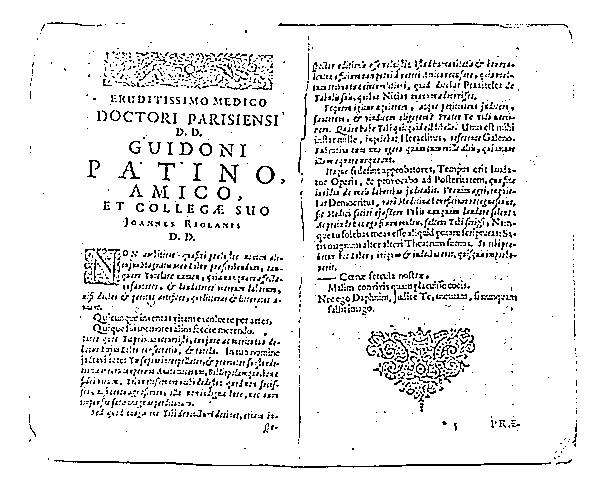

In [34]:
imagemBlur = cv2.GaussianBlur(imagem_0, (3,3), 0)

imagem_thresh3 = cv2.adaptiveThreshold(imagemBlur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5)
cv2_imshow(imagem_thresh3)

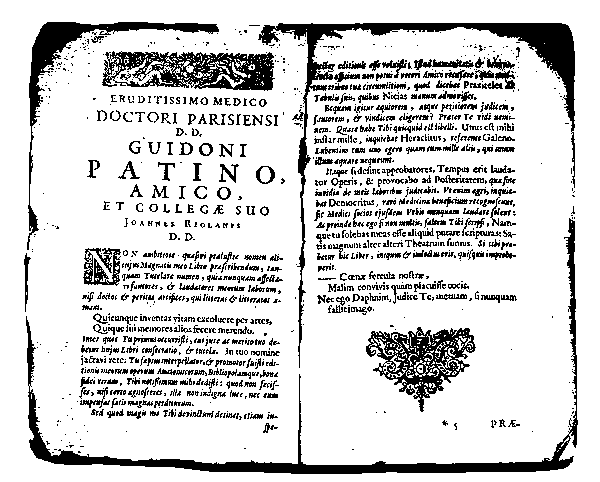

In [35]:
ret, imagem_thresh4 = cv2.threshold(imagem_0, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(imagem_thresh4)

In [37]:
import numpy as np

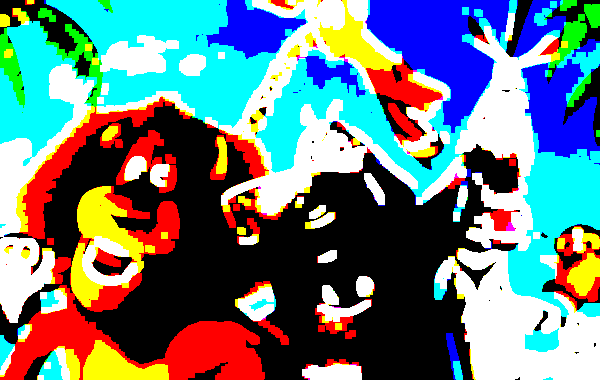

In [38]:
imagem_00 = cv2.imread('/Madagascar.jpg')

mascara = np.zeros_like(imagem_00)
a =(100, 100)
mascara[a] = 255
mascara[imagem_00 > 200] = 255
for i in range(0, 3):
  mascara = cv2.dilate(mascara, None, iterations=1)

cv2_imshow(mascara)


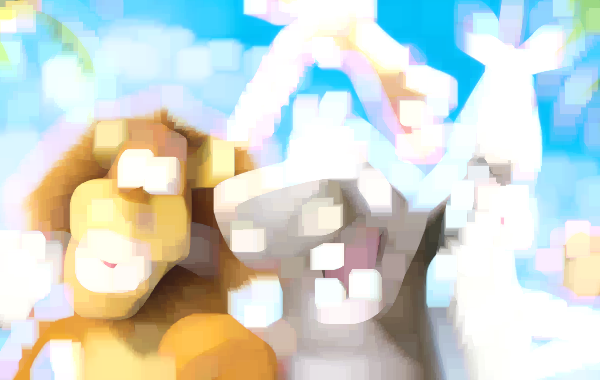

In [39]:
imagem_01 = cv2.dilate(imagem_00, None, iterations=10)

cv2_imshow(imagem_01)

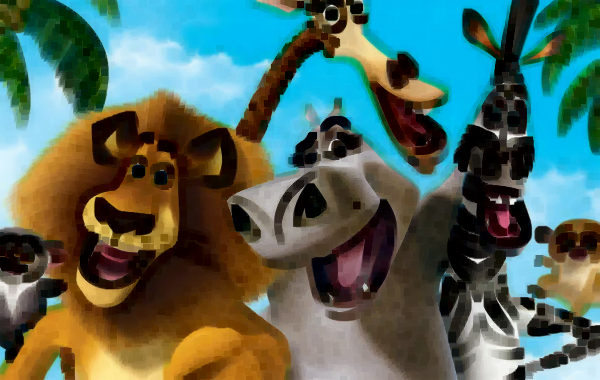

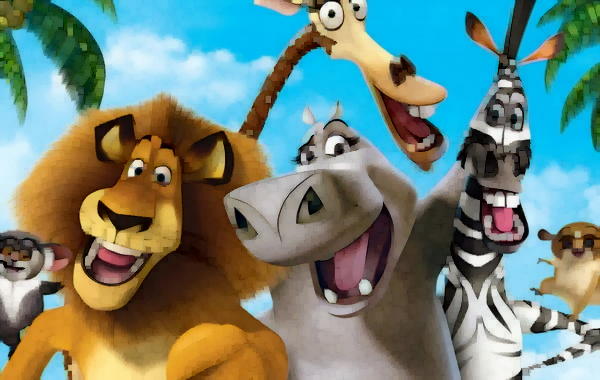

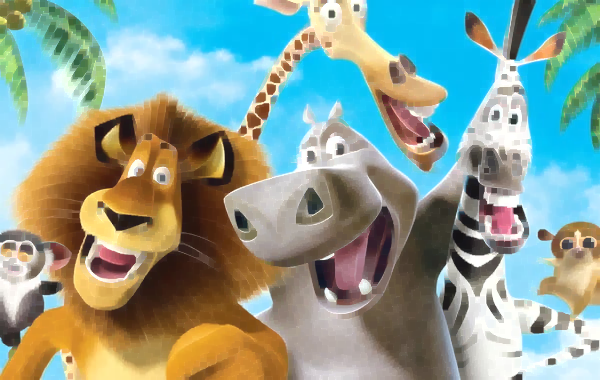

In [47]:
imagem_01 = cv2.erode(imagem_00, None, iterations=3)

cv2_imshow(imagem_01)

# Define o kernel
# Um kernel retangular 5x5 é usado como exemplo
kernel = np.ones((5,5),np.uint8)

opening = cv2.morphologyEx(imagem_00, cv2.MORPH_OPEN, kernel)
cv2_imshow(opening)
closing = cv2.morphologyEx(imagem_00, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closing)